# **Fake News Predictor (NLP)**

## Following the multiple Cambridge Analytica scandals, there is an ever expanding need of understanding where news articles come from and how truthful they are. We are going to attempt to implement machine learning algorithms on a dataset with text from articles which are defined as fake or real news.

![title](fake_news_pic.jpg)

## Preprocessing the Data

### *Importing necessary modules*

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

import timeit
import warnings

### *Import and inspect the .csv files*

In [2]:
fake_news = pd.read_csv('FakeNews.csv')
true_news = pd.read_csv('TrueNews.csv')

In [3]:
display(fake_news.head())
display(true_news.head())

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


### *Check for NaN values*

In [4]:
print('FAKE NEWS')
display(fake_news.info())
print('')
print('TRUE NEWS')
display(true_news.info())

FAKE NEWS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


None


TRUE NEWS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


None

### *Check to see if 'subject' columns match up*

In [5]:
display(fake_news['subject'].unique())
display(true_news['subject'].unique())

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

array(['politicsNews', 'worldnews'], dtype=object)

### *Not possible to infer which 'fake_news' subjects would best match 'true_news' subjects, so we will drop this column*

In [6]:
fake_news = fake_news.drop(['subject'], axis=1)
true_news = true_news.drop(['subject'], axis=1)

### *Creating a column to be able to identify which are fake post merge*

In [7]:
fake_news['true?'] = fake_news['true?'] = False
true_news['true?'] = true_news['true?'] = True

display(fake_news.head())
display(true_news.head())

,title,text,date,true?
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,"December 31, 2017",False
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,"December 31, 2017",False
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...","December 30, 2017",False
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...","December 29, 2017",False
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,"December 25, 2017",False


,title,text,date,true?
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,"December 29, 2017",True


### *Merging the dataframes and shuffling*

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 22489 to 5397
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   44898 non-null  object
 1   text    44898 non-null  object
 2   date    44898 non-null  object
 3   true?   44898 non-null  bool  
dtypes: bool(1), object(3)
memory usage: 1.4+ MB


None

,title,text,date,true?
22489,"21WIRE.TV Members Newsletter – Sept 9, 2016",21st Century Wire says If you have only recent...,"September 9, 2016",False
16942,China summons British official over Hong Kong ...,BEIJING (Reuters) - China has summoned a Briti...,"October 20, 2017",True
4961,"Campaign Manager: ‘I’m White, I Was Moved’ By...",Republican presidential candidate Donald Trump...,"August 21, 2016",False
9288,MSNBC’S JOY REID Gets a Huge Dose of KARMA fro...,Now this is sweet KARMA! If you ve ever watche...,"Dec 3, 2017",False
13342,WOW! TRUMP HELPS HILLARY SEE Her First Big Cro...,Hillary s crowds have been nothing short of ab...,"Aug 4, 2016",False


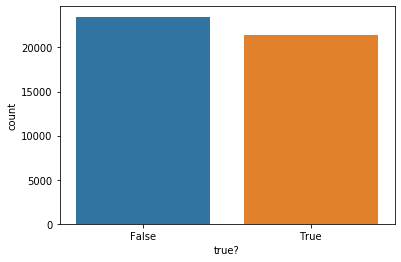

In [8]:
news = pd.concat([fake_news, true_news])

news = shuffle(news)

display(news.info())
display(news.head())

#Visualising the spread of the data
sns.countplot(news['true?'])

### *A roughly balanced set of fake and true news = Ideal, the dataframes have aligned and are ready to be trained*

## Predicting using CountVectorizer

In [9]:
#Text Classifier using CountVectorizer

X = news['text']
y = news['true?']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [10]:
#Naive Bayes Model

nb_classifier = MultinomialNB()

#fitting the classifier to the train data
nb_classifier.fit(count_train, y_train)

#predicted verdict
y_pred = nb_classifier.predict(count_test)

#accuracy score
score = metrics.accuracy_score(y_test, y_pred)
print('The accuracy of this model on the test data is ' + str(score))

The accuracy of this model on the test data is 0.9508537490720119


In [11]:
#Confusion Matrix for using CountVectorizer

matrix = metrics.confusion_matrix(y_test, y_pred)

print(matrix)

[[6620  377]
 [ 285 6188]]


### *An accuracy score of 95.0% with 671 incorrect predictions*

## Predicting using TfidfVectorizer

In [12]:
#Text Classifying using TfidfVectorizer

X = news['text']
y = news['true?']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=52)

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [13]:
#Naive Bayes Model

nb_classifier1 = MultinomialNB()

#fitting the classifier to the train data
nb_classifier1.fit(tfidf_train, y_train)

#predicted verdict
y_pred1 = nb_classifier1.predict(tfidf_test)

#accuracy score
score1 = metrics.accuracy_score(y_test, y_pred1)
print('The accuracy of this model on the test data is ' + str(score1))

The accuracy of this model on the test data is 0.9353377876763177


In [14]:
#Confusion Matrix for using TfidfVectorizer

matrix1 = metrics.confusion_matrix(y_test, y_pred1)

print(matrix1)

[[6674  412]
 [ 459 5925]]


### *An accuracy score of 93.8% with 829 incorrect predictions*

## Optimising the TfidfVectorizer Model

### *Optimising the smoothing levels (alpha)*

In [15]:
alphas = np.arange(0,1, step=0.1)

def train_and_predict(alpha):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    y_pred1 = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, y_pred1)
    return score

#Iterating over the alphas and computing score

warnings.simplefilter("ignore", UserWarning)

for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.9400890868596882

Alpha:  0.1
Score:  0.94090571640683

Alpha:  0.2
Score:  0.9391239792130661

Alpha:  0.30000000000000004
Score:  0.938158871566444

Alpha:  0.4
Score:  0.9374907201187824

Alpha:  0.5
Score:  0.9368968077208611

Alpha:  0.6000000000000001
Score:  0.9363028953229399

Alpha:  0.7000000000000001
Score:  0.9359317000742391

Alpha:  0.8
Score:  0.9354862657757981

Alpha:  0.9
Score:  0.9351150705270973



In [16]:
#accuracy is maximised at an alpha level of 0.1

nb_classifier1 = MultinomialNB(alpha=0.1)

#fitting the classifier to the train data
nb_classifier1.fit(tfidf_train, y_train)

#predicted verdict
y_pred1 = nb_classifier1.predict(tfidf_test)

#accuracy score
score1 = metrics.accuracy_score(y_test, y_pred1)
print('The accuracy of the new model on the test data is ' + str(score1))

The accuracy of the new model on the test data is 0.94090571640683


### *An increase of 0.5% accuracy compared to the original model*

## Pipeline Model for Prediction

### *Utlising the CountVectorizer vectorizer with TfidfTransformer through a logistic regression*

In [19]:
X = news['text']
y = news['true?']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

pipeline = Pipeline([('vector' , CountVectorizer()),
                     ('transformer' , TfidfTransformer()),
                     ('reg' , LogisticRegression())])

model = pipeline.fit(X_train, y_train)
y_pred2 = model.predict(X_test)

score2 = metrics.accuracy_score(y_test, y_pred2)
print('The accuracy of the pipeline model on the test data is ' + str(score2))

The accuracy of the pipeline model on the test data is 0.9844840386043059


In [18]:
matrix2 = metrics.confusion_matrix(y_test, y_pred2)

print(matrix2)

[[6862  135]
 [  74 6399]]


### *An accuracy score of 98.7% with 179 incorrect predictions. Evidently the strongest predictor*

# Conclusion: A pipeline driven model which firstly vectorizes the text then transforms it and outputs a logistic regression prediction as a final estimator is the optimal model in predicting whether a news article is fake news or true. 